In [1]:
# Bibliotecas necesarias
import pandas as pd
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt

In [2]:
class STOPWORDAnalyzer:
    def __init__(self, df):
        self.df = df
    
    def remove_stopwords(self):
        # Cargar las stopwords en inglés
        stopwords = text.ENGLISH_STOP_WORDS
        
        # Leer el DataFrame de palabras comunes
        df_palabras_comunes = pd.read_csv(self.df)
        
        # Contar la frecuencia de cada palabra antes de eliminar las stopwords
        frecuencias_originales = df_palabras_comunes['Frecuencia']
        
        # Obtener las palabras del DataFrame
        palabras_comunes = df_palabras_comunes['Palabra'].tolist()
        
        # Eliminar las stopwords y obtener las frecuencias actualizadas
        palabras_interesantes = []
        frecuencias_actualizadas = []
        for palabra, frecuencia in zip(palabras_comunes, frecuencias_originales):
            if palabra not in stopwords:
                palabras_interesantes.append(palabra)
                frecuencias_actualizadas.append(frecuencia)
        
        # Crear un nuevo DataFrame con las palabras de interés y sus frecuencias
        df_palabras_interesantes = pd.DataFrame({'Palabra': palabras_interesantes, 'Frecuencia': frecuencias_actualizadas})
        
        return df_palabras_interesantes

In [3]:
# Ruta del archivo CSV de palabras comunes
archivo_palabras_comunes = 'AssetPricingModelspalabras_comunes.csv'

# Crear una instancia de la clase STOPWORDAnalyzer
stopword_analyzer = STOPWORDAnalyzer(archivo_palabras_comunes)

# Remover las stopwords y obtener las palabras de interés con sus frecuencias
df_palabras_interesantes = stopword_analyzer.remove_stopwords()

# Guardar las palabras de interés y sus frecuencias en un nuevo archivo CSV
df_palabras_interesantes.to_csv('AssetPricingModelspalabras_interesantes.csv', index=False)

In [4]:
# Cargar el archivo CSV con las palabras de interés y sus frecuencias
archivo_palabras_interesantes = 'AssetPricingModelspalabras_interesantes.csv'
df_palabras_interesantes = pd.read_csv(archivo_palabras_interesantes)

# Obtener las 70 primeras palabras de interés y sus frecuencias
palabras_interesantes = df_palabras_interesantes['Palabra'].head(70)
frecuencias = df_palabras_interesantes['Frecuencia'].head(70)

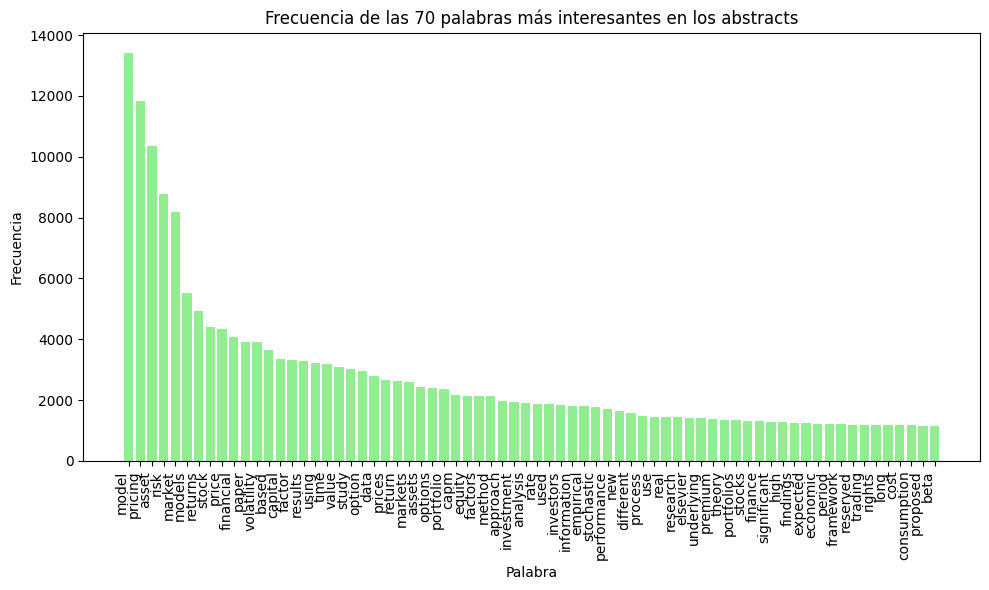

In [5]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras_interesantes, frecuencias, color='lightgreen')

# Añadir título y etiquetas
plt.title('Frecuencia de las 70 palabras más interesantes en los abstracts')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()